# **Trend Setters - Data Science with Spotify**
##### By: Daya Novich and Naomi Rosenbaum

### **Step 1: Setup & Imports**
##### By importing various libraries from Python, we are able to do various manipulation of date such as converting files from JSON to CSV, using seaborn, matplotlib, and statsmodels to visulalize data and verify hypothesis.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import warnings
import json
import csv

### **Step 2: Data Processing**
##### We first start by creating a JSON file of the gathered information on top spotify songs, we created a JSON file using Firebase.Then we converted it into a CSV file, allowing us to then create our first dataframe.
##### For each song we list the Title, Artist, Duration, if its Explicit, Genre, and Streams number at time of data collection.

In [32]:
with open('spotifyDB.json') as json_file:
    data = json.load(json_file)


titles = data['Songs']

data_file = open('spotifyDB.csv', 'w')
csv_writer = csv.writer(data_file)
csv_writer.writerow(titles[0].keys())
for title in titles:
    csv_writer.writerow(title.values())
data_file.close()



### **Step 3: Data Integration**


##### After converting our original dataset to a csv file, we can finally begin our data processing. We created our database to begin the integration process. Because we created the database, there wasn't much cleaning that needed to be done to integrate our data. 


In [6]:
df = pd.read_csv('spotifyDB.csv', dtype='str', error_bad_lines=False)
df


/var/folders/t_/twf8s6q91kn5v32pz5_9fglh0000gn/T/ipykernel_38086/808744729.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('spotifyDB.csv', dtype='str', error_bad_lines=False)


,Title,Artist,Duration,Explicit,Genre,Streams
0,As It Was,Harry Styles,147,False,"Pop, Soft Pop, Rock",213605271
1,Bad Habits,Ed Sheeran,231,False,"Alternative Indie, Pop",1039399457
2,Bam Bam,"Camila Cabello, Ed Sheeran",206,false,"French Urban Pop, R&B, Soul, Pop",115050175
3,Better Days,"NEIKED, Mae Muller, Polo G",161,false,"Disco, Pop, Funk",216617133
4,Bones,Imagine Dragons,165,False,"Alternative, Indie",50803142
5,Boyfriend,Dove Cameron,153,True,"R&B, Soul, Pop",144493104
6,Cold Heart,"Elton John, Dua Lipa, PNAU",203,False,"Disco, Pop",795549029
7,Desesperados,"Rauw Alejandro, Chencho Corleone",225,True,Latin Urbano,279140212
8,Easy On Me,Adele,225,False,"Pop, Soul",850155014
9,Enemy,"Imagine Dragons, JID, Arcane, League of Legends",173,False,"Alternative Indie, Pop, Hip-Hop, Rap, R&B, Soul",591721256


##### We wanted to see the correlation between a songs streams and the length of the song based on Spotify's top 50 hits, so we began by making one dataframe consisting of just pop songs, the seemingly most popular genre within our database. 

In [12]:
df2 = df.loc[df['Genre'].str.contains('Pop')]
df2

,Title,Artist,Duration,Explicit,Genre,Streams
0,As It Was,Harry Styles,147,False,"Pop, Soft Pop, Rock",213605271
1,Bad Habits,Ed Sheeran,231,False,"Alternative Indie, Pop",1039399457
2,Bam Bam,"Camila Cabello, Ed Sheeran",206,false,"French Urban Pop, R&B, Soul, Pop",115050175
3,Better Days,"NEIKED, Mae Muller, Polo G",161,false,"Disco, Pop, Funk",216617133
5,Boyfriend,Dove Cameron,153,True,"R&B, Soul, Pop",144493104
6,Cold Heart,"Elton John, Dua Lipa, PNAU",203,False,"Disco, Pop",795549029
8,Easy On Me,Adele,225,False,"Pop, Soul",850155014
9,Enemy,"Imagine Dragons, JID, Arcane, League of Legends",173,False,"Alternative Indie, Pop, Hip-Hop, Rap, R&B, Soul",591721256
11,Fingers Crossed,Lauren Spencer-Smith,175,False,Pop,151318265
13,Ghost,Justin Beiber,153,False,Pop,473826288


### Data Visualization

##### We then created a couple graphs to help us determine the correlation between the duration of a song (in seconds) and the number of streams a song has. Obviously there are many other factors that come in to play, but we wanted to explore the correlation specifically within Today's Top Hits on Spotify. 

In [29]:
df[['Duration']].astype(float)
df[['Streams']].astype(float)

,Streams
0,2.136053e+08
1,1.039399e+09
2,1.150502e+08
3,2.166171e+08
4,5.080314e+07
5,1.444931e+08
6,7.955490e+08
7,2.791402e+08
8,8.501550e+08
9,5.917213e+08


TypeError: 'value' must be an instance of str or bytes, not a float

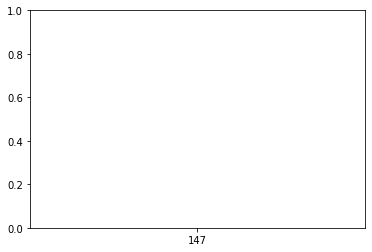

In [30]:
duration = 'Duration'
streams = 'Streams'

plt.plot(duration, streams, data = df, linestyle = 'none', marker = 'o')

m, b = np.polyfit(df[duration], df[streams], 1)
plt.plot(df[duration], m * df[duration] + b)


In [ ]:
# donut pie graph
plt.pie(df_sorted_genres)

my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show

##### Based on these graphs we could conclude that there was a correlation - songs in the pop genre seem to be most streamed at the moment. 

### Data Validation

###### 

In [ ]:
x = df[['Streams']]
y = df[['Genre']]
regression = sm.OLS(x, y)
results = regression.fit()
print(results.summary())